## モジュール宣言

In [1]:
import pandas as pd
import MeCab
import ipadic
from collections import Counter
import re
import matplotlib.pyplot as plt
import japanize_matplotlib

## データ抽出

### 現場から

In [3]:
data=pd.read_csv("./朝ポキ出演者 共同編集用 スプレッドシート - ニュースの現場から.csv")
data.head()

,omny.fm へのリンク,日付,タイトル,コメント,MC,出演者1,出演者2,出演者3,音源編集,備考・メモ・作業された方のお名前(ハンドルネーム可)
0,https://omny.fm/shows/asahi/9-ny-1,"Thu, 06 Aug 2020 02:06:00 +0000",#1 ニューヨーク 感染爆発、でも9割が対応支持 NY覆う「戦時の空気」,NaN,神田大介,"藤原学思,ニューヨーク支局",NaN,NaN,NaN,いーむ（em_em000）
1,https://omny.fm/shows/asahi/9-ny,"Sat, 08 Aug 2020 02:00:00 +0000",#2 ローマ 奔放イタリア、コロナで見せた従順 マフィアのボスも…,NaN,神田大介,"河原田慎一,ローマ支局",NaN,NaN,NaN,いーむ（em_em000）
2,https://omny.fm/shows/asahi/28bbd9d5-fe0e-4a05...,"Sun, 09 Aug 2020 02:00:00 +0000",#3 モスクワ① 医師が事実を訴えると、警察くるロシア プーチン氏は…,NaN,神田大介,"石橋亮介,モスクワ支局",NaN,NaN,NaN,いーむ（em_em000）
3,https://omny.fm/shows/asahi/c4b6b21d-f0c6-4bfe...,"Sun, 09 Aug 2020 02:00:00 +0000",#4 モスクワ② 緊急事態宣言、出さないプーチン大統領 抗議もバーチャル,NaN,神田大介,"石橋亮介,モスクワ支局",NaN,NaN,NaN,いーむ（em_em000）
4,https://omny.fm/shows/asahi/9afa3ecf-29ff-4faa...,"Sun, 09 Aug 2020 02:01:00 +0000",#5 モスクワ③ 実は欧米より制限ゆるかったロシア 日本を見て驚いた,NaN,神田大介,"石橋亮介,モスクワ支局",NaN,NaN,NaN,いーむ（em_em000）


### メディアトーク

In [19]:
data=pd.read_csv("./朝ポキ出演者 共同編集用 スプレッドシート - メディアトーク.csv")
data.head()

,omny.fm へのリンク,日付,タイトル,コメント,MC,出演者1,出演者2,出演者3,音源編集,備考・メモ・作業された方のお名前(ハンドルネーム可)
0,https://omny.fm/shows/asahi/d08ba6e2-439c-4497...,"Thu, 06 Aug 2020 02:47:00 +0000",#1 東京オリンピック、本当に開催できる？ 「普通に考えたら…」,NaN,神田大介,"稲垣康介,編集委員",NaN,NaN,NaN,bajibu
1,https://omny.fm/shows/asahi/2-1-75,"Wed, 12 Aug 2020 01:00:00 +0000",#2-1 被爆75年 燃えた誰かの背中、自分を見ると…声で残す被爆者の思い,NaN,神田大介,"武田肇,朝日新聞大阪社会部",片桐安子,NaN,NaN,bajibu
2,https://omny.fm/shows/asahi/2-2-75,"Thu, 13 Aug 2020 01:00:00 +0000",#2-2 被爆75年 ただ怖く、助ける気持ちは生まれない 講演で語った記憶,NaN,神田大介,"伊藤繭莉,朝日新聞西部報道センター",山口美代子,NaN,NaN,bajibu
3,https://omny.fm/shows/asahi/af8e73b9-1824-400d...,"Thu, 13 Aug 2020 09:00:00 +0000",#2-3 被爆75年 被爆者の記憶、コンサートで残す いつも歌った青春を,NaN,神田大介,"伊藤繭莉,朝日新聞西部報道センター",山口美代子,NaN,NaN,bajibu
4,https://omny.fm/shows/asahi/b24b9ba0-bb09-4a93...,"Sat, 15 Aug 2020 02:00:00 +0000",#2-4 被爆75年 私は話す、夫は語らぬ ノートの問いかけに答えた被爆者,NaN,神田大介,"榎本瑞希,朝日新聞長崎総局",浦部豊子,NaN,NaN,bajibu


### SDGs

In [30]:
data=pd.read_csv("./朝ポキ出演者 共同編集用 スプレッドシート - SDGs.csv")
data.head()

,omny.fm へのリンク,日付,タイトル,コメント,MC,出演者1,出演者2,出演者3,音源編集,備考・メモ・作業された方のお名前(ハンドルネーム可)
0,https://omny.fm/shows/asahi/sdgs-11-1-0,"Sun, 24 Oct 2021 19:00:00 +0000",SDGsのこと、シンプルに話そう 11月1日スタート #0,NaN,"神田大介,音声ディレクター,コンテンツ編成本部",NaN,NaN,NaN,NaN,ネジート
1,https://omny.fm/shows/asahi/sdgs-1,"Sun, 31 Oct 2021 19:00:00 +0000",SDGsって、きれいごと？ ハフポスト前編集長の竹下隆一郎さんと話した（前編） #1,NaN,"神田大介,音声ディレクター,コンテンツ編成本部","竹下隆一郎,PIVOT執行役員,ハフィントンポスト日本版前編集長",NaN,NaN,NaN,ネジート
2,https://omny.fm/shows/asahi/sdgs-2,"Mon, 01 Nov 2021 19:00:00 +0000",SDGs、大企業がいいように使ってない？ 竹下隆一郎さんと話した（中編） #2,NaN,"神田大介,音声ディレクター,コンテンツ編成本部","竹下隆一郎,PIVOT執行役員,ハフィントンポスト日本版前編集長",NaN,NaN,NaN,ネジート
3,https://omny.fm/shows/asahi/sdgs-3,"Tue, 02 Nov 2021 19:00:00 +0000",SDGsとは、矛盾を受け入れることかも 竹下隆一郎さんと話した（後編） #3,NaN,"神田大介,音声ディレクター,コンテンツ編成本部","竹下隆一郎,PIVOT執行役員,ハフィントンポスト日本版前編集長",NaN,NaN,NaN,ネジート
4,https://omny.fm/shows/asahi/lgbt-4,"Wed, 03 Nov 2021 19:00:00 +0000",（再）スポーツとLGBT① トランスジェンダー女性、五輪に初出場 #4,NaN,"神田大介,音声ディレクター,コンテンツ編成本部","忠鉢信一,東京スポーツ部",NaN,NaN,NaN,ネジート


## テスト分析

In [31]:
tagger = MeCab.Tagger(ipadic.MECAB_ARGS)
print(tagger.parse("ニューヨーク　感染爆発、でも9割が対応支持　NY覆う「戦時の空気」"))

ニューヨーク	名詞,固有名詞,地域,一般,*,*,ニューヨーク,ニューヨーク,ニューヨーク
　	記号,空白,*,*,*,*,　,　,　
感染	名詞,サ変接続,*,*,*,*,感染,カンセン,カンセン
爆発	名詞,サ変接続,*,*,*,*,爆発,バクハツ,バクハツ
、	記号,読点,*,*,*,*,、,、,、
でも	接続詞,*,*,*,*,*,でも,デモ,デモ
9	名詞,数,*,*,*,*,*
割	名詞,接尾,助数詞,*,*,*,割,ワリ,ワリ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
対応	名詞,サ変接続,*,*,*,*,対応,タイオウ,タイオー
支持	名詞,サ変接続,*,*,*,*,支持,シジ,シジ
　	記号,空白,*,*,*,*,　,　,　
NY	名詞,固有名詞,組織,*,*,*,*
覆う	動詞,自立,*,*,五段・ワ行促音便,基本形,覆う,オオウ,オオウ
「	記号,括弧開,*,*,*,*,「,「,「
戦時	名詞,一般,*,*,*,*,戦時,センジ,センジ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
空気	名詞,一般,*,*,*,*,空気,クウキ,クーキ
」	記号,括弧閉,*,*,*,*,」,」,」
EOS



In [32]:
texts="ニューヨーク　感染爆発、でも9割が対応支持　NY覆う「戦時の空気」"
texts=titleAll
node=tagger.parseToNode(texts)
wordsList=[]
while node:
    print("-----")
    print(node)
    word=node.surface
    print("{0}".format(word))
    wordsList.append(word)
    node=node.next

-----
<Swig Object of type 'MeCab::Node *' at 0x14b122eb0>

-----
<Swig Object of type 'MeCab::Node *' at 0x13f398ab0>
#
-----
<Swig Object of type 'MeCab::Node *' at 0x13fd2a3b0>
1
-----
<Swig Object of type 'MeCab::Node *' at 0x13f398ab0>
東京
-----
<Swig Object of type 'MeCab::Node *' at 0x13fd2a3b0>
オリンピック
-----
<Swig Object of type 'MeCab::Node *' at 0x14b122730>
、
-----
<Swig Object of type 'MeCab::Node *' at 0x13fd2a3b0>
本当に
-----
<Swig Object of type 'MeCab::Node *' at 0x14b122730>
開催
-----
<Swig Object of type 'MeCab::Node *' at 0x13fd2a3b0>
できる
-----
<Swig Object of type 'MeCab::Node *' at 0x13f398ab0>
？
-----
<Swig Object of type 'MeCab::Node *' at 0x13fd2a3b0>
　
-----
<Swig Object of type 'MeCab::Node *' at 0x13f398ab0>
「
-----
<Swig Object of type 'MeCab::Node *' at 0x13fd2a3b0>
普通
-----
<Swig Object of type 'MeCab::Node *' at 0x13f398ab0>
に
-----
<Swig Object of type 'MeCab::Node *' at 0x13fd2a3b0>
考え
-----
<Swig Object of type 'MeCab::Node *' at 0x13f398ab0>
たら
-----
<Swig

##　本分析

### タイトルの結合

In [33]:
titleAll=""
for title in data["タイトル"] :
    titleAll=titleAll+title
print(titleAll)

SDGsのこと、シンプルに話そう　11月1日スタート #0SDGsって、きれいごと？　ハフポスト前編集長の竹下隆一郎さんと話した（前編） #1SDGs、大企業がいいように使ってない？　竹下隆一郎さんと話した（中編） #2SDGsとは、矛盾を受け入れることかも　竹下隆一郎さんと話した（後編） #3（再）スポーツとLGBT①　トランスジェンダー女性、五輪に初出場 #4（再）スポーツとLGBT②　人に言えない「自分」は、誰にでもある #5不格好な野菜も、原爆も　SDGsを「活用」したいという話① #6じつは既に、やってるのかも　SDGsを「活用」したいという話② #7（再）アカデミー賞、なぜマイノリティー枠？　単なる「ポリコレ」ではなかった #8（再）「ブラックパンサー」成功の影響　私たちも無関係ではなかった #9（再）「野球少女」から見えた分断　兵役は男性差別なのか #10（再）こんな夜更けにパクチーかよ　手渡された約束の花束 #11（再）笑顔咲いた God bless you　人生の最期は歌とともに #12（再）医師は「大丈夫」でも「持たない！」　おばぁたちは見抜いた #13（再）口から食べたい、旅立ちの日まで　ケーキも酒も味わえる #14（再）ひとの最期を予知できる犬　ペットに看取られる幸せ #15ごみだらけの海、私とつながっていた　瀬戸内海で漁船に同乗 #16捨てないで！そのリーバイス501　町工場が挑んだ大量生産・廃棄の壁 #17（再）動物園で生まれ、でも私たちの食卓へ？　「余剰動物」たちの悲劇 #18（再）動物園はノアの箱舟か　選別される命、人間のエゴ #19（再）そのペット、本当に飼える？　コロナでバブル、あおるメディア #20ベーシックインカム、オランダの社会実験　自由より大事なものとは #21同性婚、「日本」が壁になっている　台湾で見たジェンダーのいま #22（再）そういえば、昔は男声だったのに　AIはなぜ女性化した #23（再）シングルマザーと永田町　思想も忖度も越えた「共感力」 #24（再）ギグワーカーは本当に自由？　新しい働き方が抱える古い問題 #25（再）その弁当もネット通販も　他人事ではないベトナム人の「地獄」 #26（再）命を絶ったベトナム人留学生　何が彼を追い詰めたのか #27（再）「食い物」にされる実習生　ベトナム人犯罪の裏側を辿る #2

### Mecabエンジンで分析

In [34]:
K_parsed = tagger.parse(titleAll)
print(K_parsed)

SDGs	名詞,固有名詞,組織,*,*,*,*
の	助詞,連体化,*,*,*,*,の,ノ,ノ
こと	名詞,非自立,一般,*,*,*,こと,コト,コト
、	記号,読点,*,*,*,*,、,、,、
シンプル	名詞,形容動詞語幹,*,*,*,*,シンプル,シンプル,シンプル
に	助詞,副詞化,*,*,*,*,に,ニ,ニ
話そ	動詞,自立,*,*,五段・サ行,未然ウ接続,話す,ハナソ,ハナソ
う	助動詞,*,*,*,不変化型,基本形,う,ウ,ウ
　	記号,空白,*,*,*,*,　,　,　
11	名詞,数,*,*,*,*,*
月	名詞,一般,*,*,*,*,月,ツキ,ツキ
1	名詞,数,*,*,*,*,*
日	名詞,接尾,助数詞,*,*,*,日,ニチ,ニチ
スタート	名詞,サ変接続,*,*,*,*,スタート,スタート,スタート
#	記号,一般,*,*,*,*,*
0	名詞,数,*,*,*,*,*
SDGs	名詞,固有名詞,組織,*,*,*,*
って	助詞,格助詞,連語,*,*,*,って,ッテ,ッテ
、	記号,読点,*,*,*,*,、,、,、
きれい	名詞,形容動詞語幹,*,*,*,*,きれい,キレイ,キレイ
ごと	名詞,接尾,一般,*,*,*,ごと,ゴト,ゴト
？	記号,一般,*,*,*,*,？,？,？
　	記号,空白,*,*,*,*,　,　,　
ハフポスト	名詞,固有名詞,組織,*,*,*,*
前	接頭詞,名詞接続,*,*,*,*,前,ゼン,ゼン
編集	名詞,サ変接続,*,*,*,*,編集,ヘンシュウ,ヘンシュー
長	名詞,接尾,一般,*,*,*,長,チョウ,チョー
の	助詞,連体化,*,*,*,*,の,ノ,ノ
竹下	名詞,固有名詞,人名,姓,*,*,竹下,タケシタ,タケシタ
隆一郎	名詞,固有名詞,人名,名,*,*,隆一郎,リュウイチロウ,リューイチロー
さん	名詞,接尾,人名,*,*,*,さん,サン,サン
と	助詞,格助詞,一般,*,*,*,と,ト,ト
話し	動詞,自立,*,*,五段・サ行,連用形,話す,ハナシ,ハナシ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
（	記号,括弧開,*,*,*,*,（,（,（
前編	名詞,一般,*,*,*,*,前編,ゼンペン,ゼンペン
）	記号,括弧閉,*,*,*,*,）,）,）
#	記号,一般,*,*,*,*,*
1	名詞,数

### カウント

#### 一般名称をカウント（printで表示）

In [35]:
#念の為分析をもう一度
K_parsed = tagger.parse(titleAll)
#分析データを改行ごとに切り取り
K_parsed_lines = K_parsed.split('\n')

#処理に使うリストを作成
K_parsed_words = []
K_words = []
 
#各行のタブ（\t）を除去
for K_parsed_line in K_parsed_lines:
    K_parsed_words.append(re.split('[\t,]', K_parsed_line))
 
#名詞・一般に該当する単語をリストに格納
for K_parsed_word in K_parsed_words:
    if (    K_parsed_word[0] not in ('EOS', '') 
        and K_parsed_word[1] == '名詞'
        and K_parsed_word[2] == '固有名詞'):
        
            K_words.append(K_parsed_word[0])
 
# 出現頻度上位15語を抽出して表示
K_counter = Counter(K_words)
for K_word, K_count in K_counter.most_common(500):
    print('%s : %s' % (K_word, K_count))

日本 : 14
ベトナム : 10
SDGs : 8
リアル : 8
竹下 : 6
隆一郎 : 6
沖縄 : 6
アメリカ : 5
井上 : 4
広島 : 4
滋賀 : 4
伊藤 : 4
洋志 : 4
秋田 : 3
米 : 3
ミャンマー : 3
昭和 : 3
with : 3
LGBT : 2
AI : 2
永田町 : 2
ハリウッド : 2
森 : 2
東北 : 2
インド : 2
埼玉 : 2
フィリピン : 2
Z : 2
北京 : 2
コツ : 2
BTS : 2
南米 : 2
起 : 2
モヤ : 2
毎日新聞 : 2
アフリカ : 2
中国 : 2
堀江 : 2
昌史 : 2
京都 : 2
宇治 : 2
野間 : 2
南極 : 2
江北 : 2
韓国 : 2
イミズスタン : 2
オーストラリア : 2
朝日新聞 : 2
靖 : 2
長浜 : 2
イスラム : 2
松田 : 2
理奈 : 2
ハフポスト : 1
ポリコレ : 1
パンサー : 1
瀬戸内海 : 1
リーバイス : 1
オランダ : 1
台湾 : 1
ムラ : 1
アルゼンチン : 1
ルイス : 1
三重 : 1
テレ : 1
東南アジア : 1
養老 : 1
伊香保 : 1
国連 : 1
根本 : 1
かおる : 1
津軽 : 1
マタハラ : 1
タッパー : 1
ヨーロッパ : 1
サカ : 1
OFW : 1
ベラルーシ : 1
ボストン : 1
キリマンジャロ : 1
ミスコン : 1
YouTuber : 1
長野 : 1
智子 : 1
常見 : 1
陽平 : 1
OTAKU : 1
宏明 : 1
ウクライナ : 1
阿蘇 : 1
巨人 : 1
田中 : 1
芳樹 : 1
VC : 1
ドイツ : 1
ナチス : 1
共産 : 1
クラ : 1
ブータン : 1
ゴールデン : 1
島根 : 1
大坂 : 1
なおみ : 1
BLM : 1
東京 : 1
PFOS : 1
アデュカヌマブ : 1
環境省 : 1
富士山 : 1
トヨタ : 1
寿都 : 1
ジョブズ : 1
日 : 1
チベット : 1
ウィーン : 1
大西洋 : 1
ハワイ : 1
WTO : 1
マジョリティー : 1
ホンネ : 1
大阪 : 1
あら : 1
山代温泉 : 1
池 : 1
ヨシ :

#### 一般名詞をカウント

In [36]:
K_parsed = tagger.parse(titleAll)
K_parsed_lines = K_parsed.split('\n')

#処理に使うリストを作成
K_parsed_words = []
K_words = []
 
#各行のタブ（\t）を除去
for K_parsed_line in K_parsed_lines:
    K_parsed_words.append(re.split('[\t,]', K_parsed_line))
 
#名詞・一般に該当する単語をリストに格納
#for K_parsed_word in K_parsed_words:
#    if (    K_parsed_word[0] not in ('EOS', '') 
#        and K_parsed_word[1] == '名詞'):


for K_parsed_word in K_parsed_words:
    if (    K_parsed_word[0] not in ('EOS', '') 
        and K_parsed_word[1] == '名詞'
        and K_parsed_word[2] == '一般'):        
            K_words.append(K_parsed_word[0])
 
# 出現頻度上位15語を抽出して表示
K_counter = Counter(K_words)
wordCar=[]
wordNum=[]
for K_word, K_count in K_counter.most_common(500):
    wordCar.append(K_word)
    wordNum.append(K_count)

wordData=pd.DataFrame({"words":wordCar,"出現回数":wordNum})

#### 固有名詞をカウント

In [39]:
K_parsed = tagger.parse(titleAll)
K_parsed_lines = K_parsed.split('\n')

#処理に使うリストを作成
K_parsed_words = []
K_words = []
 
#各行のタブ（\t）を除去
for K_parsed_line in K_parsed_lines:
    K_parsed_words.append(re.split('[\t,]', K_parsed_line))
 
#名詞・一般に該当する単語をリストに格納
for K_parsed_word in K_parsed_words:
    if (    K_parsed_word[0] not in ('EOS', '') 
        and K_parsed_word[1] == '名詞'
        and K_parsed_word[2] == '固有名詞'):
        
            K_words.append(K_parsed_word[0])
 
# 出現頻度上位15語を抽出して表示
wordCar=[]
wordNum=[]
K_counter = Counter(K_words)
for K_word, K_count in K_counter.most_common(500):
    wordCar.append(K_word)
    wordNum.append(K_count)

wordData=pd.DataFrame({"words":wordCar,"出現回数":wordNum})

### 見える化

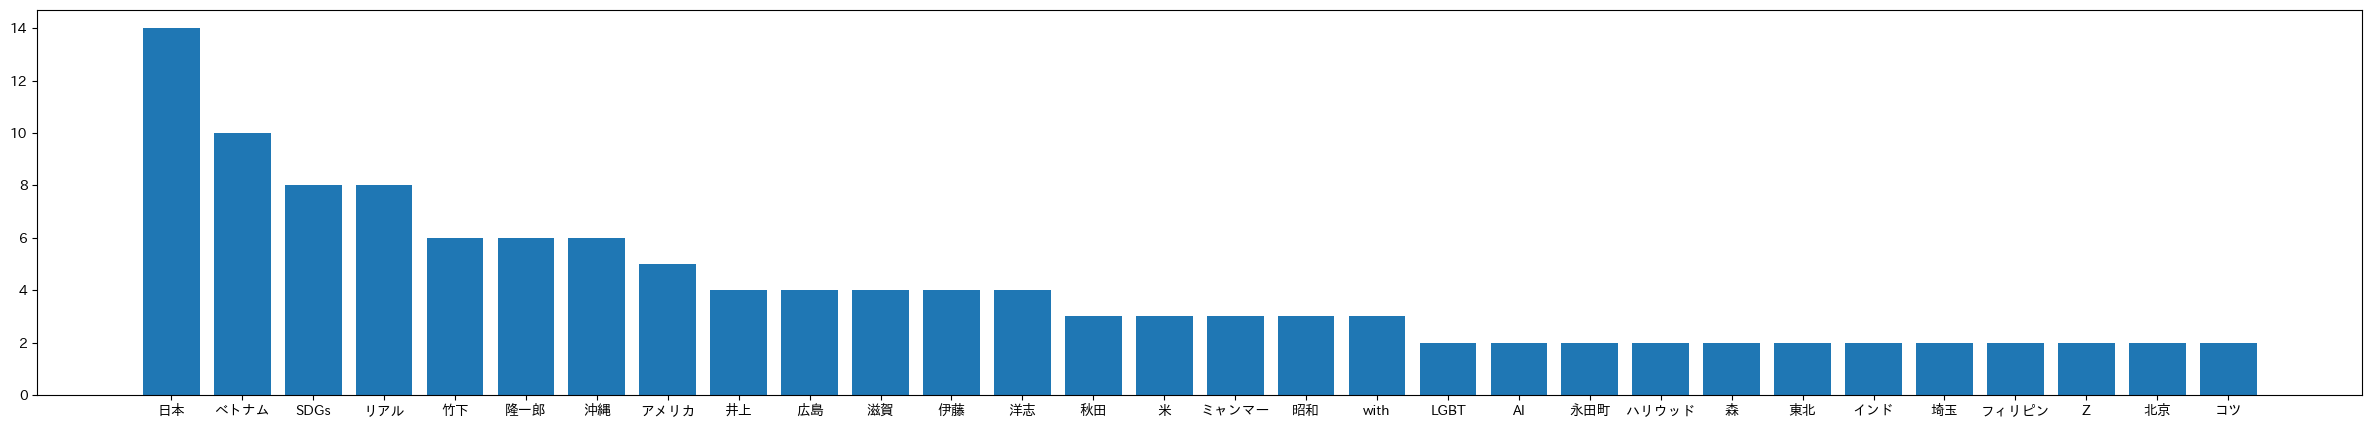

,words,出現回数
0,日本,14
1,ベトナム,10
2,SDGs,8
3,リアル,8
4,竹下,6
...,...,...
191,SNS,1
192,MC,1
193,モーツァルト,1
194,バッハ,1


In [40]:
plt.figure(figsize=[30,5])
plt.bar(wordData["words"].head(30),wordData["出現回数"].head(30))
plt.show()
wordData

### データ保存

In [41]:
wordData.to_csv("./sdgsKoyu.csv")

## 参考動詞でやってみた

In [170]:
K_parsed = tagger.parse(titleAll)
K_parsed_lines = K_parsed.split('\n')

#処理に使うリストを作成
K_parsed_words = []
K_words = []
 
#各行のタブ（\t）を除去
for K_parsed_line in K_parsed_lines:
    K_parsed_words.append(re.split('[\t,]', K_parsed_line))
 
#名詞・一般に該当する単語をリストに格納
for K_parsed_word in K_parsed_words:
    if (    K_parsed_word[0] not in ('EOS', '') 
        and K_parsed_word[1] == '動詞'):
        
            K_words.append(K_parsed_word[0])
 
# 出現頻度上位15語を抽出して表示
K_counter = Counter(K_words)
for K_word, K_count in K_counter.most_common(300):
    print('%s : %s' % (K_word, K_count))

し : 55
れ : 27
する : 25
い : 24
ある : 18
れる : 14
さ : 13
考える : 13
み : 12
いる : 11
やめ : 11
なる : 11
見え : 10
できる : 10
考え : 10
なっ : 9
聞く : 9
変わる : 9
話し : 8
あり : 8
見 : 7
でき : 7
変える : 7
てる : 6
られ : 6
き : 6
語る : 6
言え : 5
感じ : 5
学ぶ : 5
話そ : 4
て : 4
食べ : 4
られる : 4
ゆく : 4
起き : 4
変え : 4
広がる : 4
始め : 4
つくる : 4
あっ : 4
超え : 4
見る : 4
生き : 4
知っ : 4
思う : 4
たどっ : 4
耕さ : 4
言わ : 4
悩ん : 4
生きる : 4
語りつぐ : 4
働き : 3
追い詰め : 3
しまう : 3
増える : 3
消える : 3
支え : 3
愛す : 3
なくなる : 3
すぎる : 3
握る : 3
出 : 3
みる : 3
知ら : 3
すれ : 3
言っ : 3
見つけ : 3
超える : 3
透ける : 3
問いかけ : 3
摂 : 3
消え : 3
逃げ : 3
動い : 3
こぼれ落ちる : 3
変わっ : 3
泣い : 3
帰れ : 3
知ろ : 3
推し : 3
かけ : 3
のぼる : 3
使っ : 2
受け入れる : 2
捨て : 2
挑ん : 2
抑える : 2
忘れ : 2
捕れ : 2
忍び寄る : 2
聞い : 2
向け : 2
やってき : 2
答え : 2
求め : 2
くる : 2
選ば : 2
ひきこもり : 2
託し : 2
作ら : 2
なら : 2
始まっ : 2
増え : 2
ちゃう : 2
残る : 2
たどり着い : 2
来 : 2
向き合う : 2
支える : 2
語り合っ : 2
探し : 2
広がっ : 2
終わら : 2
消さ : 2
補う : 2
届い : 2
生き延び : 2
すぎ : 2
もん : 2
生まれる : 2
夢見 : 2
悩み : 2
防ぐ : 2
使わ : 2
会い : 2
刺さる : 2
始めよ : 2
語ろ : 2
語り : 2
せ : 2
上げ : 2
重ね : 2
襲わ : 2
